# Visualisation Ethics and Communication
# Group 2
------------------------------------------
## Course: DATA 6556
## Submitted By: Momina Liaqat Ali
------------------------------------------


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import pandas as pd

df = pd.read_csv("/content/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape, df.columns

((891, 12),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [4]:
df.isna().sum().sort_values(ascending=False)

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [5]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

df["SurvivalLabel"] = df["Survived"].map({0: "Not Survived", 1: "Survived"})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivalLabel
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Not Survived
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Not Survived


In [6]:
print(df["SurvivalLabel"].value_counts())
print("Overall survival rate:", df["Survived"].mean())

SurvivalLabel
Not Survived    549
Survived        342
Name: count, dtype: int64
Overall survival rate: 0.3838383838383838


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            891 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       891 non-null    object 
 12  SurvivalLabel  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [8]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0
Cabin,687


In [9]:
print(df["Survived"].value_counts())
print("Survival rate:", df["Survived"].mean())

Survived
0    549
1    342
Name: count, dtype: int64
Survival rate: 0.3838383838383838


In [10]:
print(df.groupby("Sex")["Survived"].agg(["count", "mean"]))

        count      mean
Sex                    
female    314  0.742038
male      577  0.188908


In [11]:
print(df.groupby("Embarked")["Survived"].agg(["count", "mean"]))
print("Missing Age:", df["Age"].isna().sum())
df["Age"].describe()
df["Fare"].describe()

          count      mean
Embarked                 
C           168  0.553571
Q            77  0.389610
S           646  0.339009
Missing Age: 0


,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


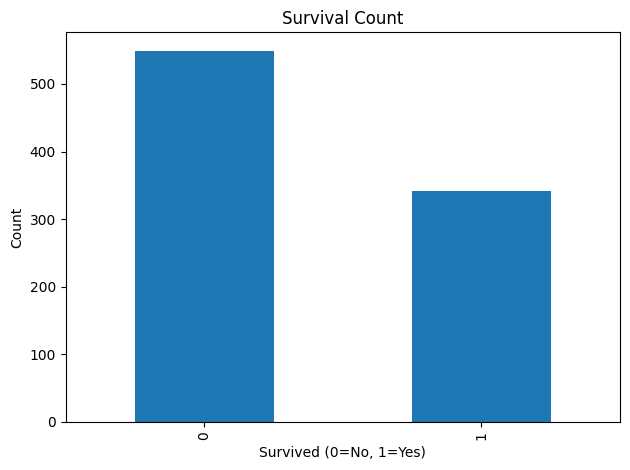

In [12]:
df["Survived"].value_counts().plot(kind="bar")
plt.title("Survival Count")
plt.xlabel("Survived (0=No, 1=Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

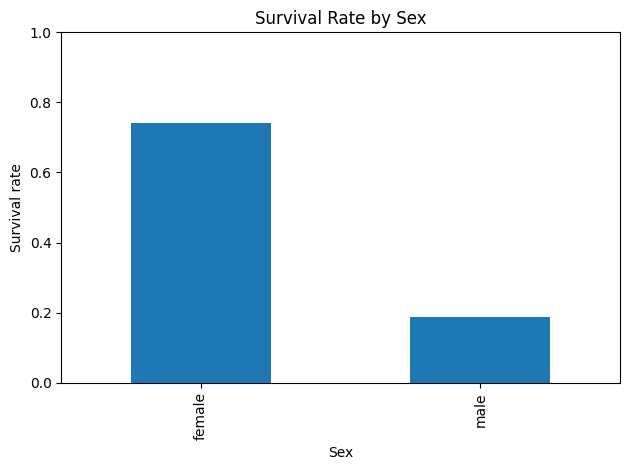

In [13]:
(df.groupby("Sex")["Survived"].mean()).plot(kind="bar")
plt.title("Survival Rate by Sex")
plt.ylabel("Survival rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

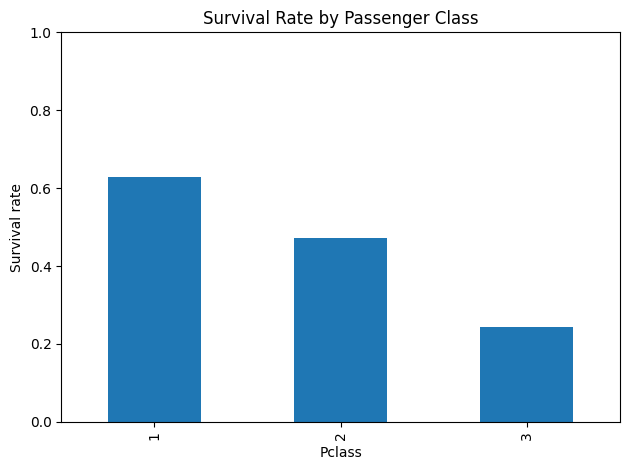

In [14]:
(df.groupby("Pclass")["Survived"].mean()).plot(kind="bar")
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

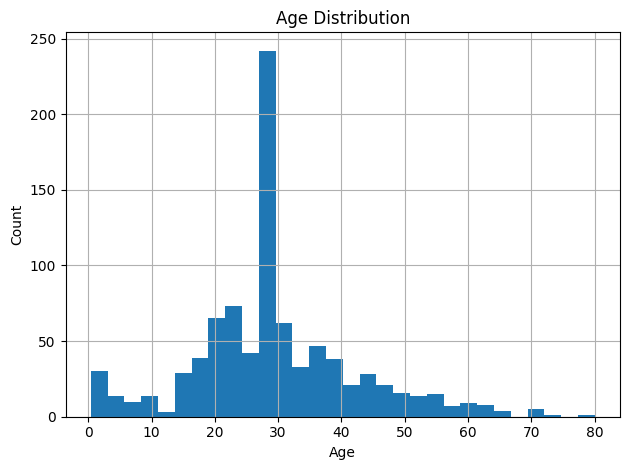

In [15]:
df["Age"].hist(bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

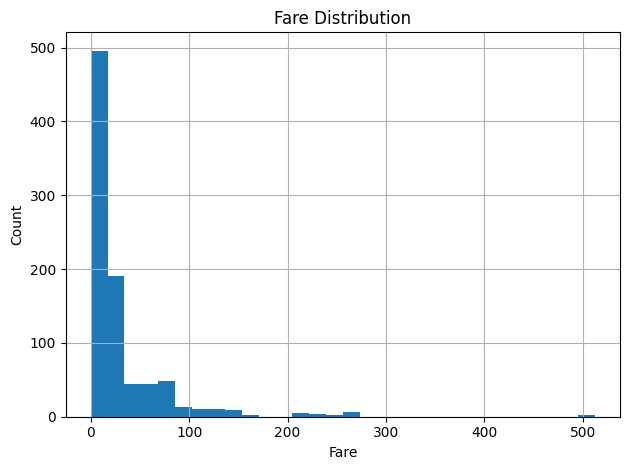

In [16]:
df["Fare"].hist(bins=30)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Good Visualisation # 1

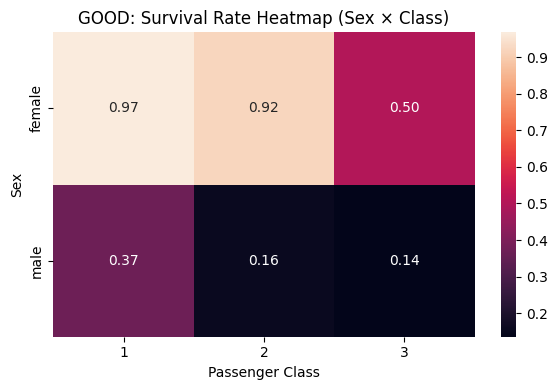

In [ ]:
pivot = df.pivot_table(values="Survived", index="Sex", columns="Pclass", aggfunc="mean")

plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt=".2f")
plt.title("GOOD: Survival Rate Heatmap (Sex × Class)")
plt.ylabel("Sex")
plt.xlabel("Passenger Class")
plt.tight_layout()
plt.show()

# Good Visualisation # 2

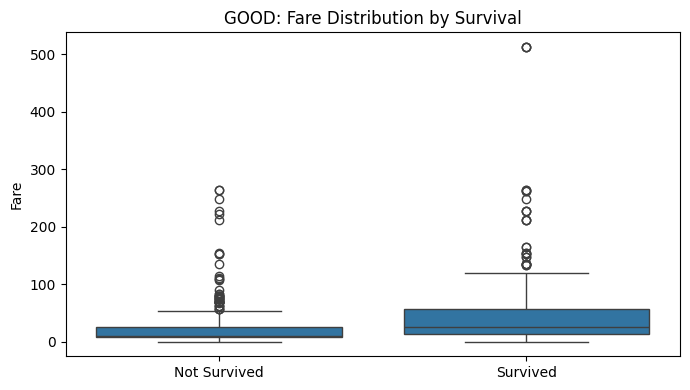

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="SurvivalLabel", y="Fare")
plt.title("GOOD: Fare Distribution by Survival")
plt.xlabel("")
plt.ylabel("Fare")
plt.tight_layout()
plt.show()

# Bad Visualisation # 1

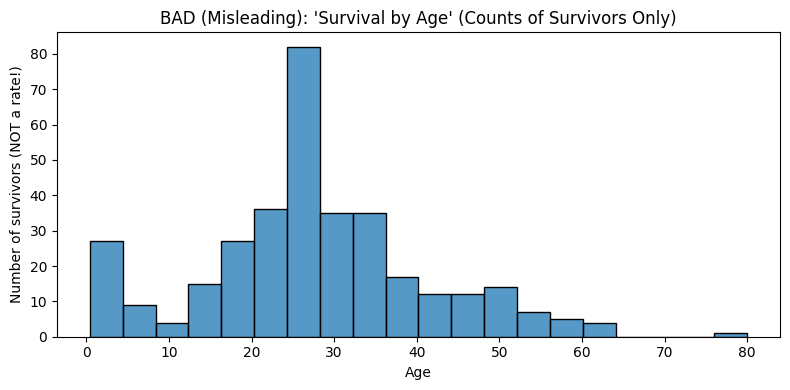

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(data=df[df["Survived"]==1], x="Age", bins=20)
plt.title("BAD (Misleading): 'Survival by Age' (Counts of Survivors Only)")
plt.xlabel("Age")
plt.ylabel("Number of survivors (NOT a rate!)")
plt.tight_layout()
plt.show()

# Bad Visualisation # 2

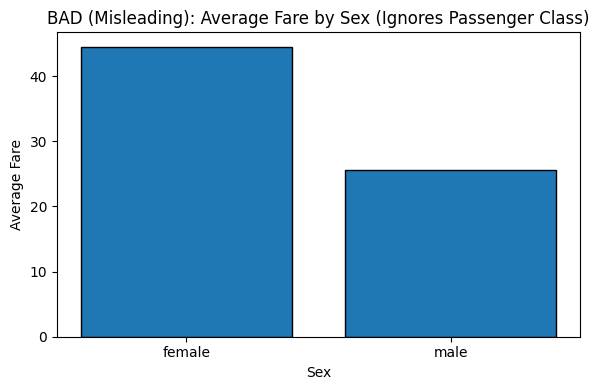

In [ ]:
avg_fare_by_sex = df.groupby("Sex")["Fare"].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
plt.bar(avg_fare_by_sex.index, avg_fare_by_sex.values, edgecolor="black")
plt.title("BAD (Misleading): Average Fare by Sex (Ignores Passenger Class)")
plt.xlabel("Sex")
plt.ylabel("Average Fare")
plt.tight_layout()
plt.show()